In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [2]:
#reading the data
df = pd.read_csv('dataset.csv')


#getting information of dataset


In [3]:
df.info()

df.shape

df.isnull().any()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()


cols = [i for i in df.iloc[:,1:].columns]
cols



['Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Symptom_4',
 'Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17']

In [5]:
tmp = pd.melt(df.reset_index() ,id_vars = ['index'], value_vars = cols )
tmp['add'] = 1
df1 = pd.pivot_table(tmp, values = 'add',index = 'index', columns = 'value')
df1.insert(0,'label',df['Disease'])
df1 = df1.fillna(0)
df1.head()

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
print(df1.shape)

(4920, 132)


In [50]:


disease = {'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}
df1.replace({'label':disease},inplace = True)



In [51]:
target = df1['label']
df2 = df1.copy()
df2 = df2.drop('label', axis =1)


In [52]:
# Defining the attributes
X = df2

#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
y = target

# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)


Training split input-  (3936, 131)
Testing split input-  (984, 131)


In [53]:
# Defining the decision tree algorithm
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')
# Predicting the values of test data
y_pred = dtree.predict(X_test)


Decision Tree Classifier Created


Text(0.5, 1.0, 'Accuracy Score: 1.0')

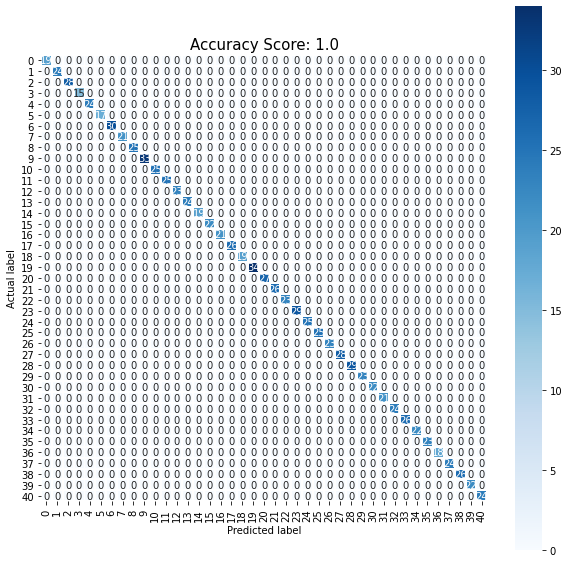

In [54]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(data=cm,linewidths=1, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

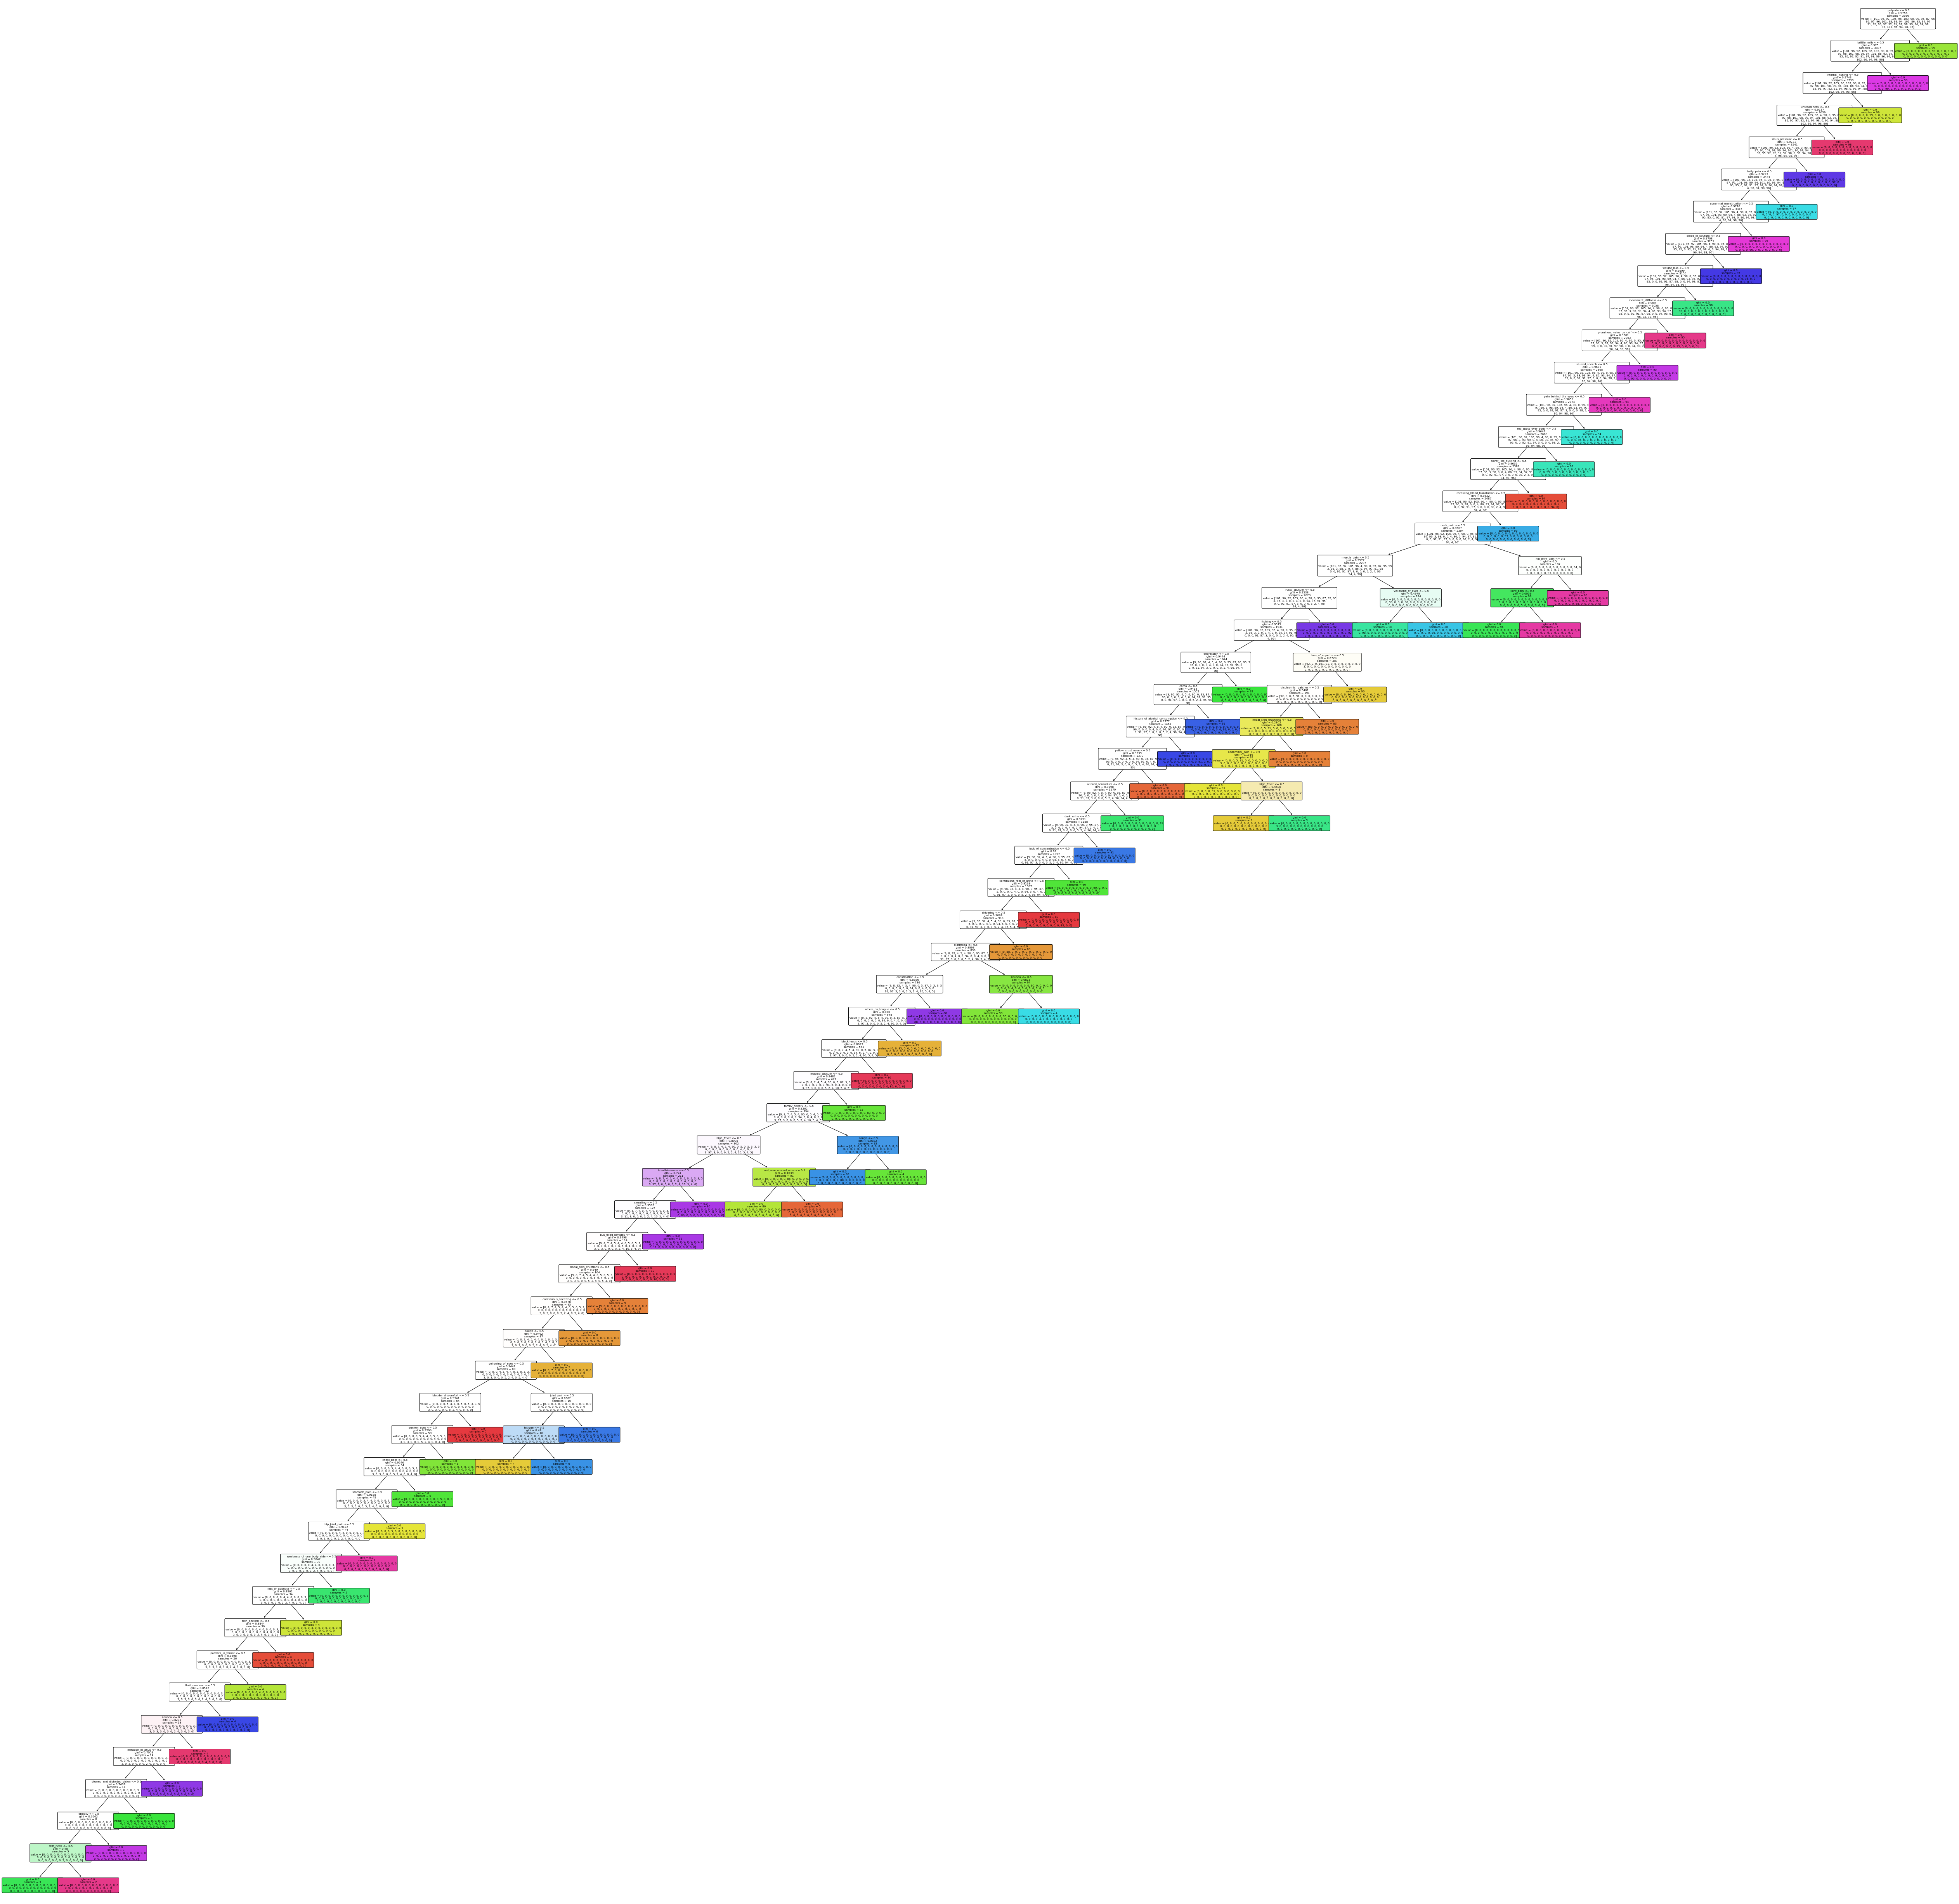

In [55]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
plt.figure(figsize = (90,90))

dec_tree = plot_tree(decision_tree=dtree, feature_names = df2.columns , filled = True , precision = 4, rounded = True, fontsize = 7)
plt.savefig('tree_high_dpi', bbox_inches ="tight")